In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout


ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (C:\Users\Ravi\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\eager\context.py)

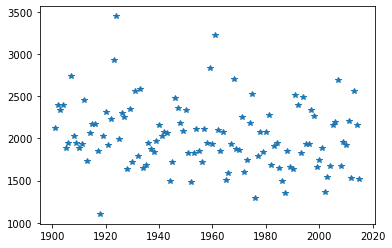

In [ ]:
import numpy as np
x=pd.read_csv("kerala.csv")
y=pd.read_csv("kerala.csv")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'*')
plt.show()

In [ ]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')

#print(len(x1))

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

#print(len(flood),len(x1))
df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        

x = pd.read_csv("out1.csv")

#x = pd.DataFrame(x)        


    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
110      KERALA  2011  20.5  45.7  24.1  165.2  124.2   788.5   536.8  492.7   
111      KERALA  2012   7.4  11.0  21.0  171.1   95.3   430.3   362.6  501.6   
112      KERALA  2013   3.9  40.1  49.9   49.3  119.3  1042.7   830.2  369.7   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8  733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0  252.2   

     ...    NOV    DEC  ANNUAL  Jan-Feb

In [ ]:


#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE


X = x.iloc[:,[16,20,21]]
y1=x.iloc[:,19].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, test_size = 0.2,  random_state=0)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = tf.keras.models.Sequential()

    # Adding the input layer and the first hidden layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 
                                                      'relu', input_dim = 3))
   # classifier.add(Dropout(p = 0.1))

   # Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation 
                                                                   = 'relu'))
   # classifier.add(Dropout(p = 0.1))

   # Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation 
                                                               = 'sigmoid'))

       # Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics 
                                                          = ['accuracy'])

# Training the ANN on the Training set
classifier.fit(X_train, Y_train, batch_size = 64, epochs = 100)






NameError: name 'Dense' is not defined

In [ ]:

q1=475 # present years march to may rainfall data on average  
w1=230 #average rainfall in past 10 days of june              
e1=260 #average inscrease in rainfall from may to june         

q2=200 # present years march to may rainfall data on average
w2=400 #average rainfall in past 10 days of june
e2=300 #average inscrease in rainfall from may to june 

q3=275.5
w3=130
e3=256


l=[[q3,w3,e1],[q2,w2,e2],[50,300,405]]


f1=ann.predict(l)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")
    
        

[0.7282546] - no chance of severe flood
[0.7282546] - no chance of severe flood
[0.7282546] - no chance of severe flood


In [ ]:
from notify import notify


l1=[[q1,w3,e3],[q3,w3,e3],[130,600,405]]
y4=[[130,600,405]]

f1=ann.predict(y4)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
        #notify()
    else:
        print(f1[i],"- no chance of severe flood")

[0.7282546] - no chance of severe flood
